In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

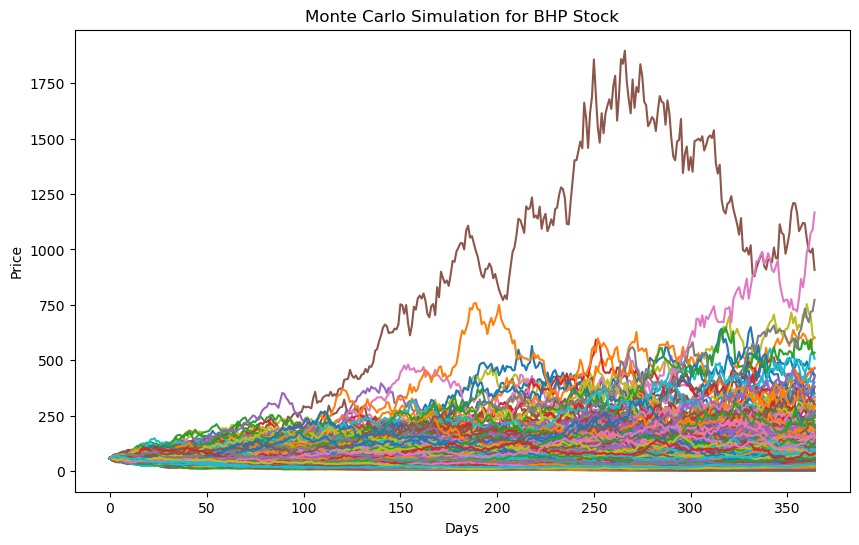

In [6]:
stock_data = yf.Ticker("BHP")
start_price = stock_data.info['regularMarketDayHigh']

bhp_df = stock_data.history()
data=bhp_df["Close"]
mean=sum(bhp_df["Close"])/len(bhp_df)
std_dev=bhp_df["Close"].std()

daily_returns = []
for i in range(1, len(data)):
    daily_return = (data[i] - data[i-1]) / data[i-1]
    daily_returns.append(daily_return)

# Calculate the mean daily return
mean_daily_return = sum(daily_returns) / len(daily_returns)


days = 365 # Number of days to simulate
mu =mean_daily_return# Mean daily return
sigma = std_dev # Standard deviation of daily return

# Create a function to simulate the stock price
def stock_price(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for i in range(1, days):
        shock[i] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[i] = mu*dt
        price[i] = price[i-1] + (price[i-1] * (drift[i] + shock[i]))
    return price

# Set the time interval
dt = 1/days

# Run the simulation
simulations = 1000 # Number of simulations
results = np.zeros((simulations, days))
for i in range(simulations):
    results[i] = stock_price(start_price, days, mu, sigma)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(results.transpose())
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for BHP Stock')
plt.show()